In [1]:
import imageio.v3 as iio
import skimage as ski


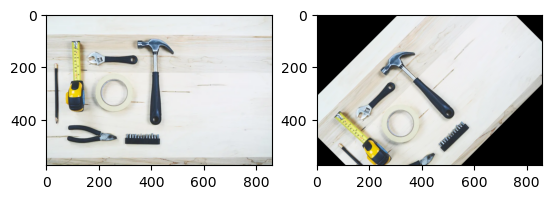

In [20]:

# load an image
image = iio.imread(uri='test/images/test2.webp')

# rotate it by 45 degrees
rotated = ski.transform.rotate(image=image, angle=45)

# display the original image and its rotated version side by side
fig, ax = plt.subplots(1, 2)
ax[0].imshow(image)
ax[1].imshow(rotated)
# 200x400

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour


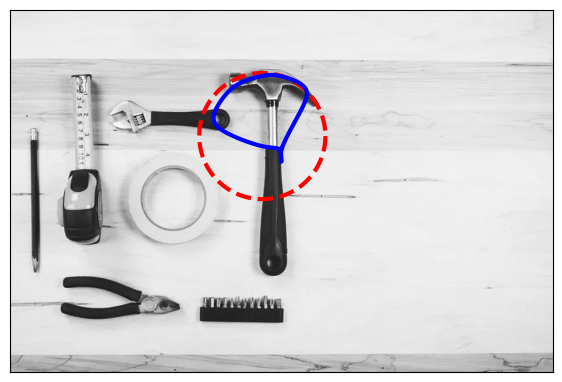

In [26]:
# img = data.astronaut()
img = iio.imread(uri='test/images/test3.jpg')
img = rgb2gray(img)

s = np.linspace(0, 2 * np.pi, 400)
r = 200 + 100 * np.sin(s)
c = 400 + 100 * np.cos(s)
init = np.array([r, c]).T

snake = active_contour(
    gaussian(img, sigma=3, preserve_range=False),
    init,
    alpha=0.015,
    beta=10,
    gamma=0.001,
)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

plt.show()

In [34]:
# img = data.astronaut()
img = iio.imread(uri='test/images/test3.jpg')
img = rgb2gray(img)

s = np.linspace(0, 2 * np.pi, 400)
r = 200 + 100 * np.sin(s)
c = 400 + 100 * np.cos(s)
init = np.array([r, c]).T

snake = active_contour(
    gaussian(img, sigma=3, preserve_range=False),
    init,
    alpha=0.015,
    beta=10,
    gamma=0.001,
)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

plt.show()

KeyboardInterrupt: 

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.ndimage import gaussian_filter
from skimage import data
from skimage import img_as_float
from skimage.morphology import reconstruction
img = iio.imread(uri='test/images/test2.webp')

# Convert to float: Important for subtraction later which won't work with uint8
image = img_as_float(img)
image = gaussian_filter(image, 1)

seed = np.copy(image)
seed[1:-1, 1:-1] = image.min()
mask = image

dilated = reconstruction(seed, mask, method='dilation')

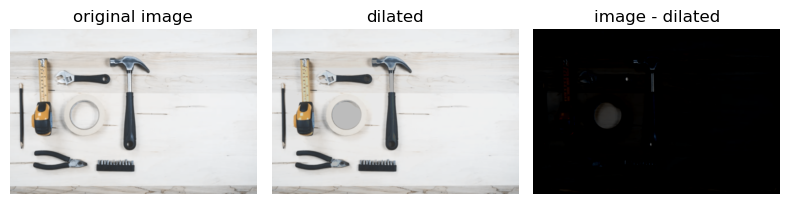

In [5]:
fig, (ax0, ax1, ax2) = plt.subplots(
    nrows=1, ncols=3, figsize=(8, 2.5), sharex=True, sharey=True
)

ax0.imshow(image, cmap='gray')
ax0.set_title('original image')
ax0.axis('off')

ax1.imshow(dilated, vmin=image.min(), vmax=image.max(), cmap='gray')
ax1.set_title('dilated')
ax1.axis('off')

ax2.imshow(image - dilated, cmap='gray')
ax2.set_title('image - dilated')
ax2.axis('off')

fig.tight_layout()


C:\Users\oran\miniconda3\envs\voidtray\Lib\site-packages\skimage\_shared\utils.py:445: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


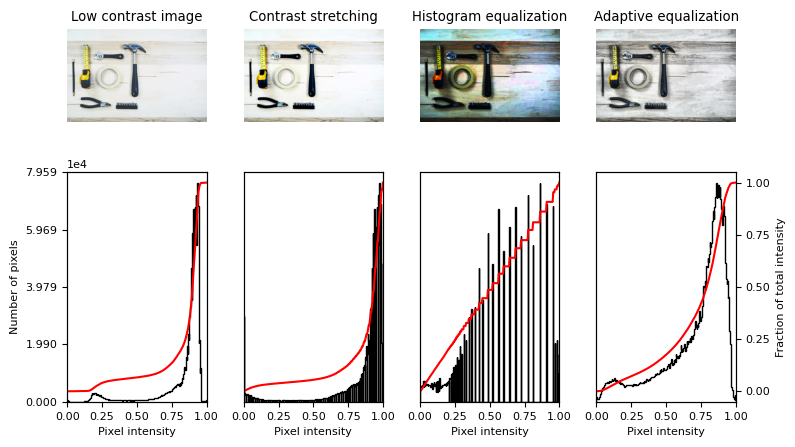

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import data, img_as_float
from skimage import exposure


matplotlib.rcParams['font.size'] = 8


def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram."""
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf


# Load an example image
# img = data.moon()
img = iio.imread(uri='test/images/test2.webp')

# Contrast stretching
p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))

# Equalization
img_eq = exposure.equalize_hist(img)

# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)

# Display results
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 4), dtype=object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1 + i, sharex=axes[0, 0], sharey=axes[0, 0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5 + i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Contrast stretching')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Histogram equalization')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
ax_img.set_title('Adaptive equalization')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

In [8]:
import imageio.v3 as iio
import matplotlib.pyplot as plt
from skimage import filters, measure, morphology, segmentation, color
import numpy as np

img = iio.imread('test/images/test2.webp')
gray = color.rgb2gray(img)


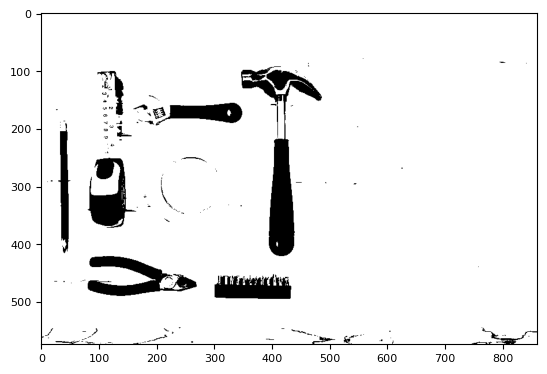

In [9]:
from skimage.filters import threshold_otsu

thresh = threshold_otsu(gray)
binary = gray > thresh  # or < if inverted

plt.imshow(binary, cmap='gray')


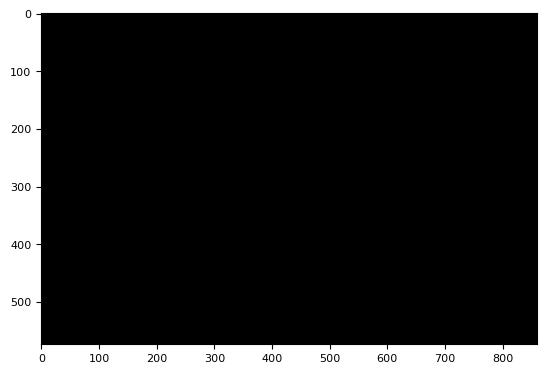

In [12]:
from skimage.filters import threshold_local

local_thresh = threshold_local(gray, block_size=35, offset=10)
binary = gray > local_thresh
plt.imshow(binary, cmap='gray')


In [13]:
from skimage import feature

edges = feature.canny(gray, sigma=2)
filled = morphology.binary_fill_holes(edges)

plt.imshow(filled, cmap='gray')


AttributeError: module 'skimage.morphology' has no attribute 'binary_fill_holes'

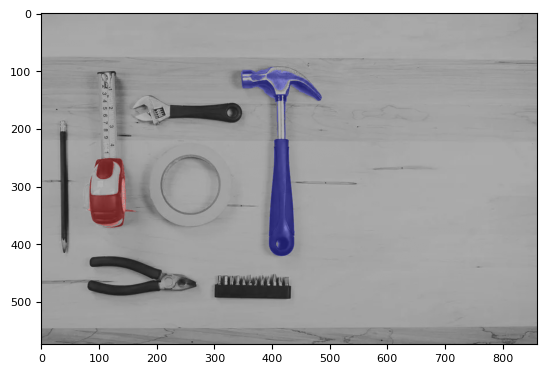

In [14]:
from scipy import ndimage as ndi

# Threshold and distance map
binary = gray < threshold_otsu(gray)
distance = ndi.distance_transform_edt(binary)
markers = ndi.label(distance > 20)[0]
labels = segmentation.watershed(-distance, markers, mask=binary)

plt.imshow(color.label2rgb(labels, image=img))


In [ ]:
cleaned = morphology.remove_small_objects(binary, min_size=100)
cleaned = morphology.remove_small_holes(cleaned, area_threshold=100)


In [3]:
import imageio.v3 as iio
import matplotlib.pyplot as plt
from skimage import color

img = iio.imread('test/images/test2.webp')

# Convert to grayscale
gray = color.rgb2gray(img)


In [4]:
from skimage.filters import threshold_otsu

thresh = threshold_otsu(gray)
mask = gray < thresh  # or `>` depending on your image


In [5]:
from skimage import morphology

mask = morphology.remove_small_objects(mask, 500)
mask = morphology.remove_small_holes(mask, 500)


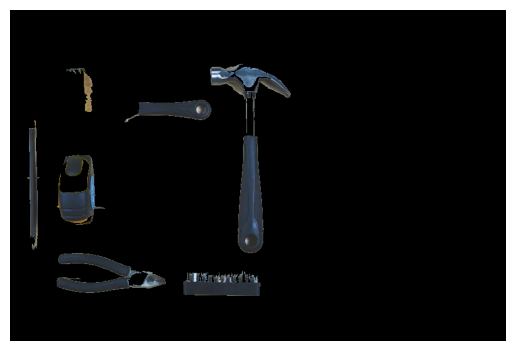

In [6]:
import numpy as np

foreground = img.copy()
foreground[~mask] = 0  # set background to black

plt.imshow(foreground)
plt.axis('off')
plt.show()


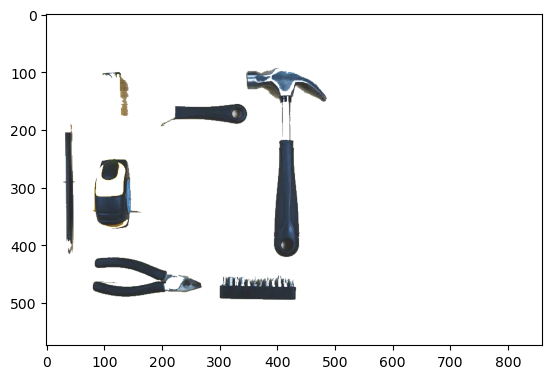

In [7]:
from skimage.util import img_as_ubyte

rgba = np.dstack([img, mask.astype(np.uint8)*255])  # A channel
rgba = img_as_ubyte(rgba)

plt.imshow(rgba)


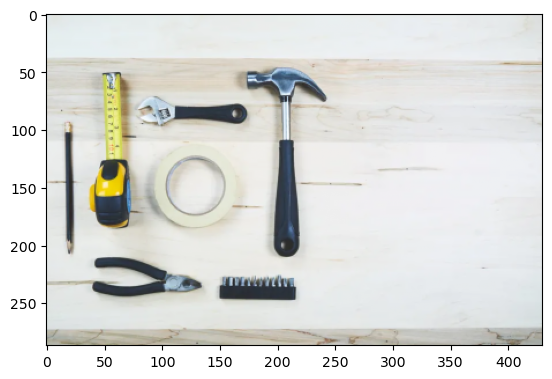

In [12]:
from skimage.transform import resize

img_resized = resize(img, (img.shape[0] // 2, img.shape[1] // 2), anti_aliasing=True)
plt.imshow(img_resized)


In [1]:
from skimage.restoration import denoise_bilateral

denoised = denoise_bilateral(img, sigma_color=0.05, sigma_spatial=15, channel_axis=-1)
plt.imshow(denoised)


NameError: name 'img' is not defined

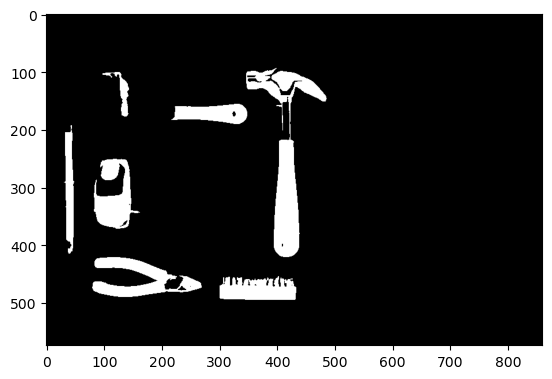

In [2]:
import imageio.v3 as iio
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu, gaussian
from skimage import morphology
import matplotlib.pyplot as plt

img = iio.imread('test/images/test2.webp')
gray = rgb2gray(img)
blurred = gaussian(gray, sigma=1)
thresh = threshold_otsu(blurred)
binary = blurred < thresh
cleaned = morphology.remove_small_objects(binary, 500)

plt.imshow(cleaned, cmap='gray')


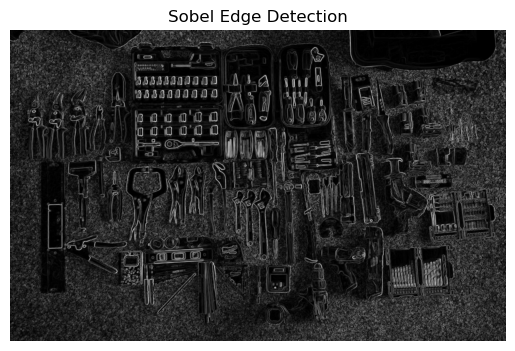

In [7]:
import imageio.v3 as iio
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.filters import sobel

# Load and convert to grayscale
img = iio.imread('test/images/test1.webp')
gray = rgb2gray(img)

# Apply Sobel filter
edges = sobel(gray)

# Show result
plt.imshow(edges, cmap='gray')
plt.title("Sobel Edge Detection")
plt.axis('off')
plt.show()


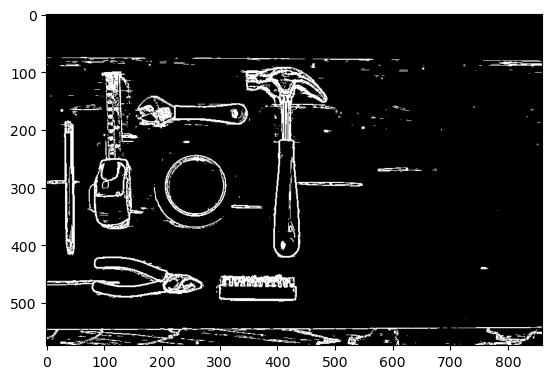

In [4]:
import numpy as np

# Try a simple threshold
binary_edges = edges > 0.5  # tune this value

plt.imshow(binary_edges, cmap='gray')


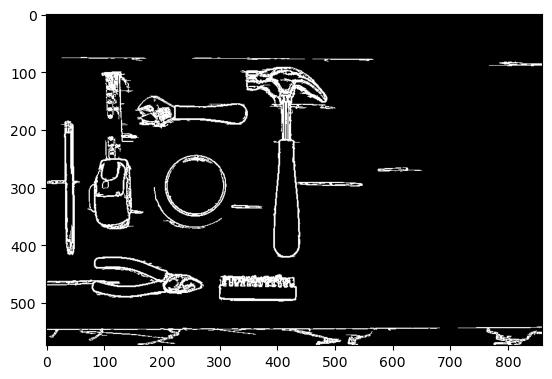

In [5]:
from skimage import morphology

cleaned_edges = morphology.remove_small_objects(binary_edges, min_size=200)
plt.imshow(cleaned_edges, cmap='gray')

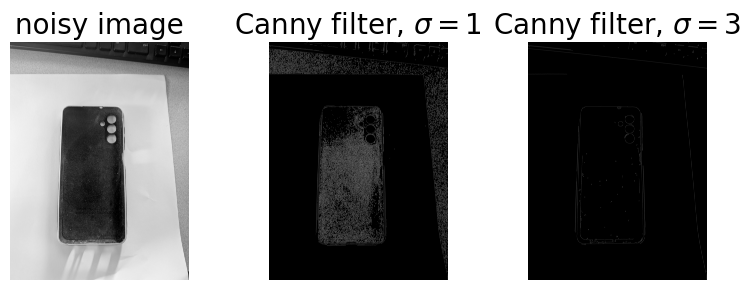

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage.util import random_noise
from skimage import feature


# Generate noisy image of a square
image = np.zeros((128, 128), dtype=float)
image[32:-32, 32:-32] = 1

image = ndi.rotate(image, 15, mode='constant')
image = ndi.gaussian_filter(image, 4)
image = random_noise(image, mode='speckle', mean=0.1)
# img = iio.imread('test/images/test1.webp')
img = iio.imread('test/images/test3.jpg')

image = rgb2gray(img)
# Compute the Canny filter for two values of sigma
edges1 = feature.canny(image)
edges2 = feature.canny(image, sigma=3)

# display results
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8, 3))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('noisy image', fontsize=20)

ax[1].imshow(edges1, cmap='gray')
ax[1].set_title(r'Canny filter, $\sigma=1$', fontsize=20)

ax[2].imshow(edges2, cmap='gray')
ax[2].set_title(r'Canny filter, $\sigma=3$', fontsize=20)
 
for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from scipy import ndimage as ndi
from skimage.util import random_noise
from skimage import feature
from skimage.color import rgb2gray
import imageio.v3 as iio

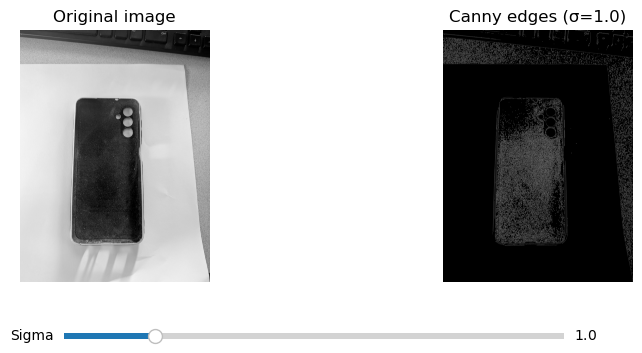

In [4]:

# Load image
img = iio.imread('test/images/test3.jpg')
image = rgb2gray(img)

# Initial sigma
initial_sigma = 1.0

# Compute initial Canny edge detection
edges = feature.canny(image, sigma=initial_sigma)

# Create plot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
plt.subplots_adjust(bottom=0.25)

# Original image
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original image')
ax[0].axis('off')

# Edge-detected image
edge_plot = ax[1].imshow(edges, cmap='gray')
ax[1].set_title(f'Canny edges (σ={initial_sigma})')
ax[1].axis('off')

# Slider setup
ax_slider = plt.axes([0.25, 0.1, 0.5, 0.03])
sigma_slider = Slider(ax_slider, 'Sigma', 0.1, 5.0, valinit=initial_sigma, valstep=0.1)

# Update function
def update(val):
    sigma = sigma_slider.val
    updated_edges = feature.canny(image, sigma=sigma)
    edge_plot.set_data(updated_edges)
    ax[1].set_title(f'Canny edges (σ={sigma:.1f})')
    fig.canvas.draw_idle()

sigma_slider.on_changed(update)

plt.show()


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
from skimage import feature
from skimage.color import rgb2gray
import imageio.v3 as iio

# Load and preprocess image
img = iio.imread('test/images/test3.jpg')
gray = rgb2gray(img)

# Define interactive function
def update_canny(sigma):
    edges = feature.canny(gray, sigma=sigma)
    
    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    plt.imshow(gray, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(edges, cmap='gray')
    plt.title(f"Canny Edges (σ={sigma:.2f})")
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Display interactive slider
interact(update_canny, sigma=FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1))


interactive(children=(FloatSlider(value=1.0, description='sigma', max=5.0, min=0.1), Output()), _dom_classes=(…

<function __main__.update_canny(sigma)>

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import FloatSlider, Button, VBox, HBox, Output
from skimage import feature
from skimage.color import rgb2gray
 

# Load and preprocess image
img = iio.imread('test/images/test3.jpg')
gray = rgb2gray(img)

# Create widgets
sigma_slider = FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1, description='Sigma:')
update_button = Button(description='Update')
output = Output()

# Define button click handler
def on_button_click(b):
    with output:
        output.clear_output(wait=True)
        sigma = sigma_slider.value
        edges = feature.canny(gray, sigma=sigma)
        
        plt.figure(figsize=(10, 4))
        plt.subplot(1, 2, 1)
        plt.imshow(gray, cmap='gray')
        plt.title("Original Image")
        plt.axis('off')
        
        plt.subplot(1, 2, 2)
        plt.imshow(edges, cmap='gray')
        plt.title(f"Canny Edges (σ={sigma:.2f})")
        plt.axis('off')
        
        plt.tight_layout()
        plt.show()

# Connect button to function
update_button.on_click(on_button_click)

# Display UI
display(VBox([HBox([sigma_slider, update_button]), output]))


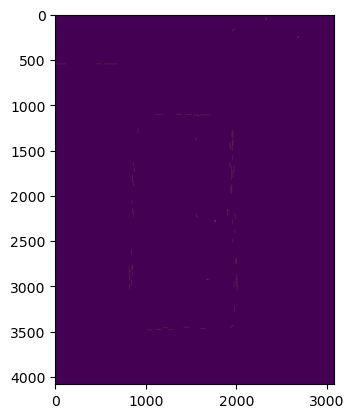

In [32]:
import numpy as np
from skimage import feature, morphology
from skimage.color import rgb2gray
img = iio.imread('test/images/test3.jpg')

gray = rgb2gray(img)

edges = feature.canny(gray, sigma=2)

# Remove small objects
# cleaned = morphology.remove_small_objects(edges, min_size=50)

# Fill holes
cleaned = morphology.remove_small_holes(cleaned, area_threshold=20)

# Morphological closing to smooth edges
# from skimage.morphology import closing, disk
# cleaned = closing(cleaned, disk(2))

# cleaned is your noise-reduced mask now
 
plt.imshow(cleaned)

In [13]:
from skimage.filters import median
from skimage.morphology import disk

filtered = median(binary_mask, disk(3))


NameError: name 'binary_mask' is not defined

C:\Users\oran\AppData\Local\Temp\ipykernel_13364\2635051922.py:11: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(image)


(np.float64(-0.5), np.float64(3071.5), np.float64(4079.5), np.float64(-0.5))

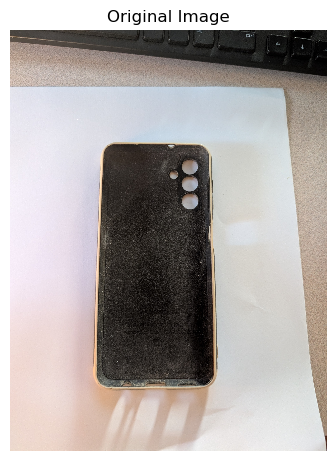

In [19]:
#Importing necesary libraries
import skimage
import numpy as np
from skimage import io as io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.filters import gaussian
from skimage.filters import threshold_otsu
from skimage.measure import find_contours#Load the image
image = skimage.io.imread('test/images/test3.jpg')
io.imshow(image)
plt.title('Original Image')
plt.axis('off')

C:\Users\oran\AppData\Local\Temp\ipykernel_13364\996865756.py:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(image)


(np.float64(-0.5), np.float64(3071.5), np.float64(4079.5), np.float64(-0.5))

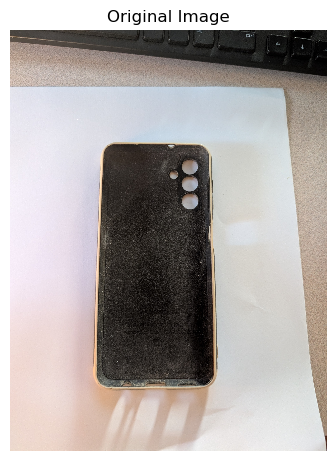

In [21]:
image = skimage.io.imread('test/images/test3.jpg')

io.imshow(image)
plt.title('Original Image')
plt.axis('off')

C:\Users\oran\AppData\Local\Temp\ipykernel_13364\656495904.py:5: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(denoised_image)


Text(0.5, 1.0, 'Grayscale Denoised Image')

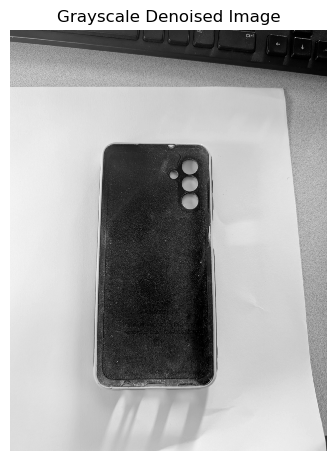

In [22]:
#Produce the grayscale image
gray_image = rgb2gray(image)
#Denoise the image
denoised_image = gaussian(gray_image, sigma=2)
io.imshow(denoised_image)
plt.axis('off')
plt.title('Grayscale Denoised Image')

C:\Users\oran\AppData\Local\Temp\ipykernel_13364\3876359985.py:8: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(binary)


Text(0.5, 1.0, 'Binary Image')

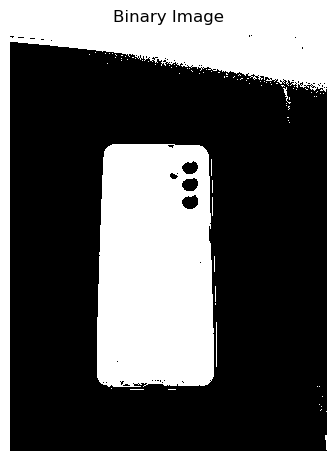

In [23]:
#Find Otsu threshold 
thresh = threshold_otsu(denoised_image)
binary_image = denoised_image < thresh
#Create a mask for the binary image where holes are 
# white (1) and the rest is black (0)
binary = np.zeros(shape=binary_image.shape)
binary[binary_image] = 1
io.imshow(binary)
plt.axis('off')
plt.title('Binary Image')

In [24]:
contours = find_contours(binary, level=0.8)

In [25]:
print('{} holes were detected in this slice of cheese.'.format(len(contours)))


498 holes were detected in this slice of cheese.


Text(0.5, 1.0, 'Grayscale Image with Detected Contours')

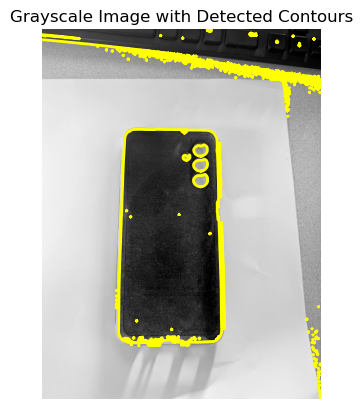

In [26]:
for contour in contours:
    plt.plot(contour[:,1], contour[:,0], linewidth=2, color='yellow')
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.title('Grayscale Image with Detected Contours')

In [35]:
# Importing the required libraries
import skimage.io as io
import skimage
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.filters import gaussian 
from skimage.segmentation import active_contour
from skimage.segmentation import random_walker
from skimage import draw
from skimage.segmentation import slic, mark_boundaries
from skimage.color import label2rgb
from skimage.segmentation import felzenszwalb, mark_boundaries

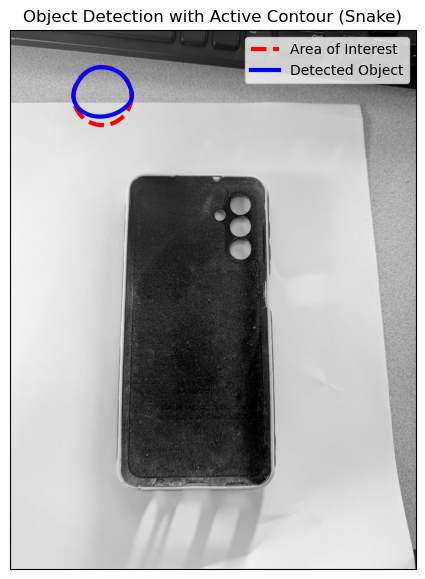

In [37]:
#Load the image
lady = io.imread('test/images/test3.jpg')
#Turn the original image to grayscale
gray_lady = rgb2gray(lady)
#Denoise the image
image = gaussian(gray_lady, 1.5, preserve_range=False)
#We will define a circle that encircles the area of interest:
#Create 400 points (in radians) in between 0 and 2*Pi
#By using these points draw a circle with the help of
# sine and cosine functions. The radius is 220 and the 
# center positioned right in the middle of the area of interest.
s = np.linspace(0, 2*np.pi, 400)
r = 500 + 220*np.sin(s)
c = 700 + 220*np.cos(s)
#Create the (x,y) coordinates of the circle by combining 
#two lists of data points
init = np.array([r,c]).T
#Apply Active Contour algorithm to the specified area:
snake = active_contour(image,
init, alpha=0.0013, beta=10, gamma=0.0007)
#Draw the pre-defined area and created contour around 
#the face on the image:
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_title('Object Detection with Active Contour (Snake)')
ax.imshow(gray_lady, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.legend(['Area of Interest', 'Detected Object'])
ax.axis([0, image.shape[1], image.shape[0], 0])
plt.show()

In [1]:
from rembg import remove
from PIL import Image
import matplotlib.pyplot as plt
import io

100%|########################################| 176M/176M [00:00<00:00, 172GB/s]


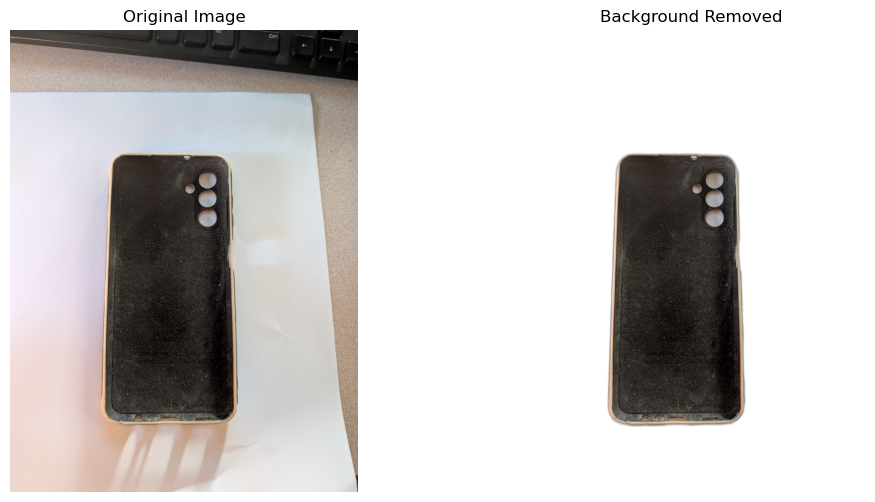

In [2]:
# Load the image with Pillow
input_path = 'test/images/test3.jpg'  # replace with your image path
img = Image.open(input_path)

# Convert image to bytes
img_bytes = io.BytesIO()
img.save(img_bytes, format='PNG')
img_bytes = img_bytes.getvalue()

# Remove background
output_bytes = remove(img_bytes)

# Convert output bytes back to image
output_img = Image.open(io.BytesIO(output_bytes))

# Plot original and background removed side by side
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(output_img)
ax[1].set_title('Background Removed')
ax[1].axis('off')

plt.show()



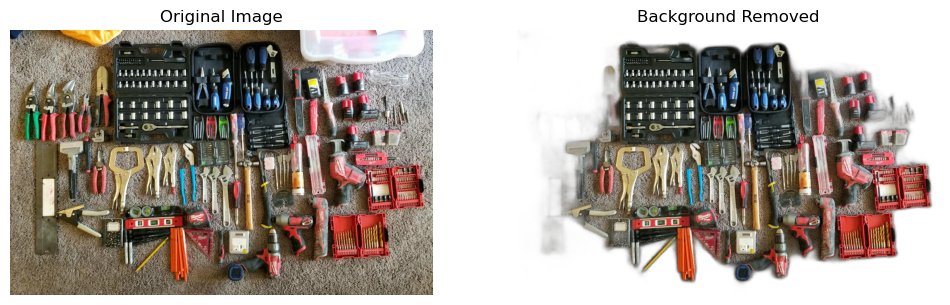

In [3]:
# Load the image with Pillow
input_path = 'test/images/test1.webp'  # replace with your image path
img = Image.open(input_path)

# Convert image to bytes
img_bytes = io.BytesIO()
img.save(img_bytes, format='PNG')
img_bytes = img_bytes.getvalue()

# Remove background
output_bytes = remove(img_bytes)

# Convert output bytes back to image
output_img = Image.open(io.BytesIO(output_bytes))

# Plot original and background removed side by side
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(output_img)
ax[1].set_title('Background Removed')
ax[1].axis('off')

plt.show()



In [ ]:
from rembg import remove
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from skimage import measure
import io

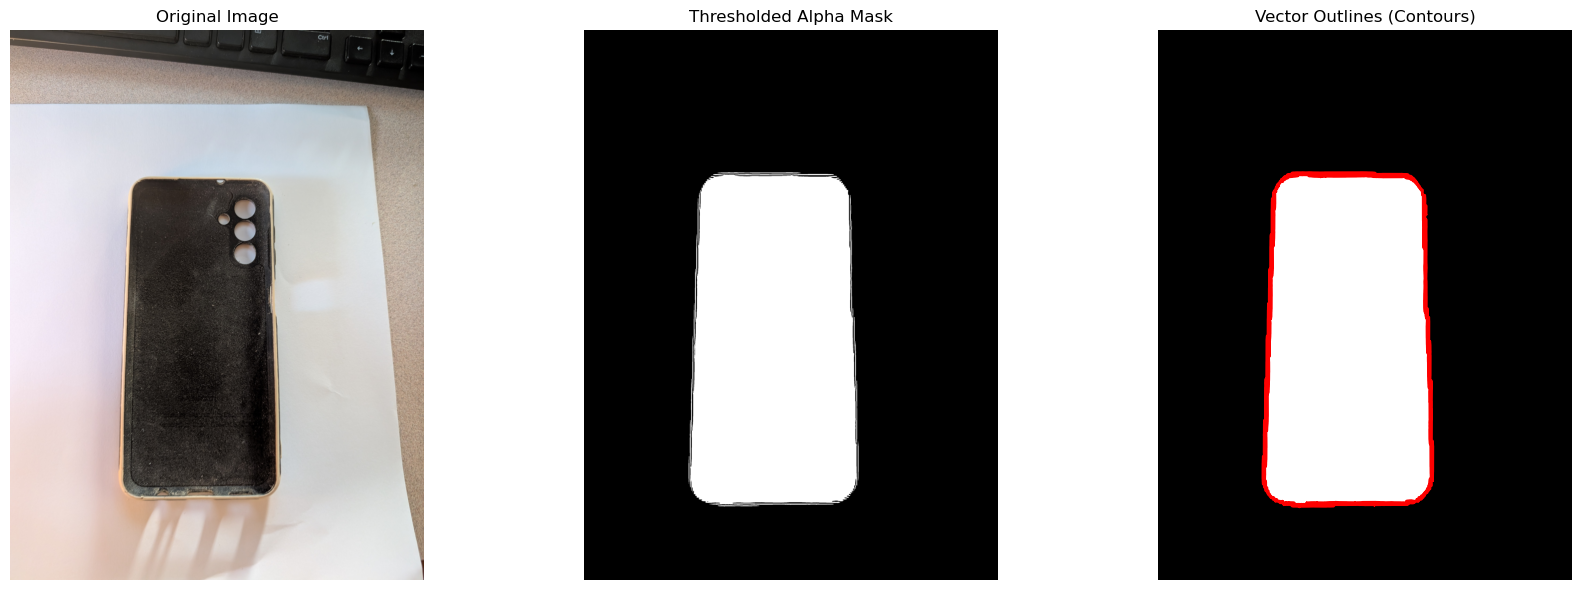

In [4]:
from rembg import remove
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from skimage import measure
import io

# Load input image and remove background
input_path = 'test/images/test3.jpg'  # replace with your image path

img = Image.open(input_path).convert('RGBA')

img_bytes = io.BytesIO()
img.save(img_bytes, format='PNG')
img_bytes = img_bytes.getvalue()

output_bytes = remove(img_bytes)
output_img = Image.open(io.BytesIO(output_bytes)).convert('RGBA')

# --- STEP 2: Threshold the alpha channel ---
alpha = np.array(output_img.split()[-1])  # extract alpha channel
binary_mask = alpha > 0  # threshold: foreground = True, background = False

# --- STEP 3: Extract contours ---
# Find contours at a constant value of 0.5 (True/False boundary)
contours = measure.find_contours(binary_mask, level=0.5)

# --- Visualization ---
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(binary_mask, cmap='gray')
ax[1].set_title('Thresholded Alpha Mask')
ax[1].axis('off')

ax[2].imshow(binary_mask, cmap='gray')
for contour in contours:
    ax[2].plot(contour[:, 1], contour[:, 0], linewidth=2, color='red')
ax[2].set_title('Vector Outlines (Contours)')
ax[2].axis('off')

plt.tight_layout()
plt.show()


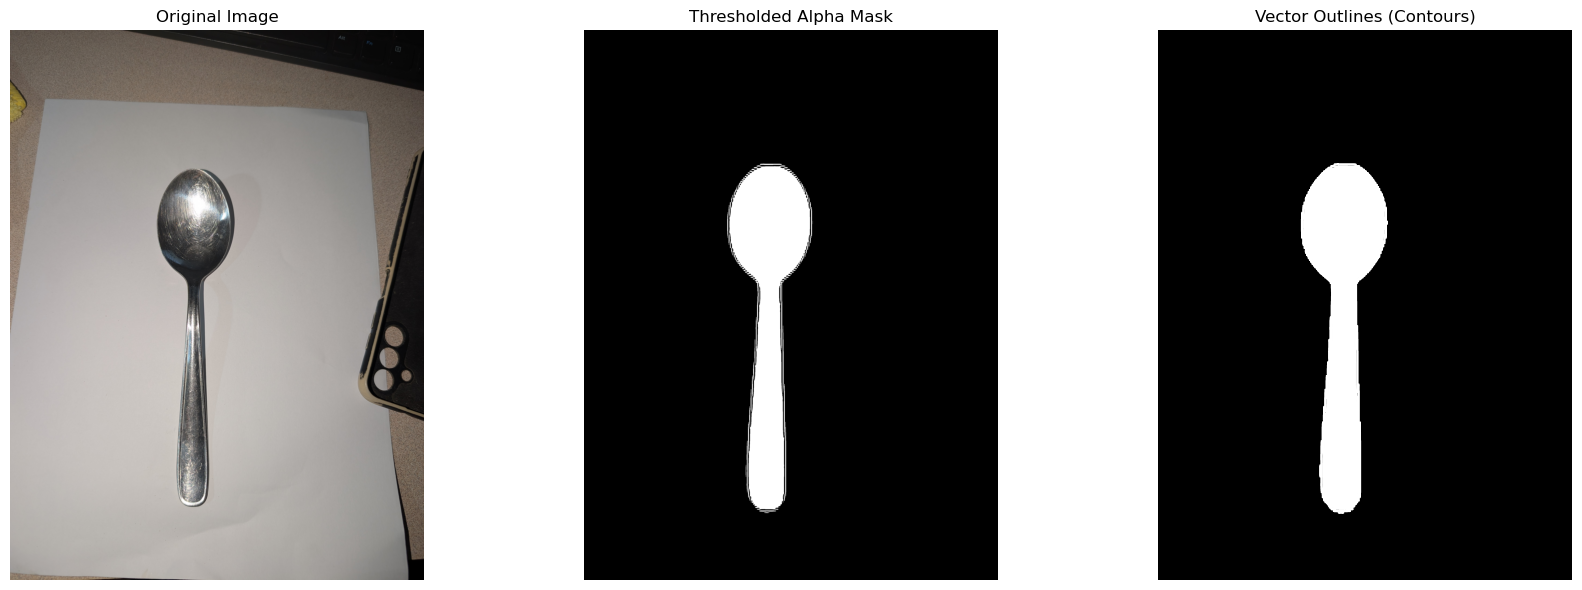

In [27]:
from rembg import remove
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from skimage import measure
import io

# Load input image and remove background
input_path = 'test/images/test4.jpg'  # replace with your image path

img = Image.open(input_path).convert('RGBA')

img_bytes = io.BytesIO()
img.save(img_bytes, format='PNG')
img_bytes = img_bytes.getvalue()

output_bytes = remove(img_bytes)
output_img = Image.open(io.BytesIO(output_bytes)).convert('RGBA')

# --- STEP 2: Threshold the alpha channel ---
alpha = np.array(output_img.split()[-1])  # extract alpha channel
binary_mask = alpha > 0  # threshold: foreground = True, background = False

# --- STEP 3: Extract contours ---
# Find contours at a constant value of 0.5 (True/False boundary)
contours = measure.find_contours(binary_mask, level=0.5)

# --- Visualization ---
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(binary_mask, cmap='gray')
ax[1].set_title('Thresholded Alpha Mask')
ax[1].axis('off')

ax[2].imshow(binary_mask, cmap='gray')
for contour in contours:
    # ax[2].plot(contour[:, 1], contour[:, 0], linewidth=.8, color='white')
    ax[2].fill(contour[:, 1], contour[:, 0], facecolor="white", edgecolor="white", linewidth=1)

ax[2].set_title('Vector Outlines (Contours)')
ax[2].axis('off')

plt.tight_layout()
plt.show()


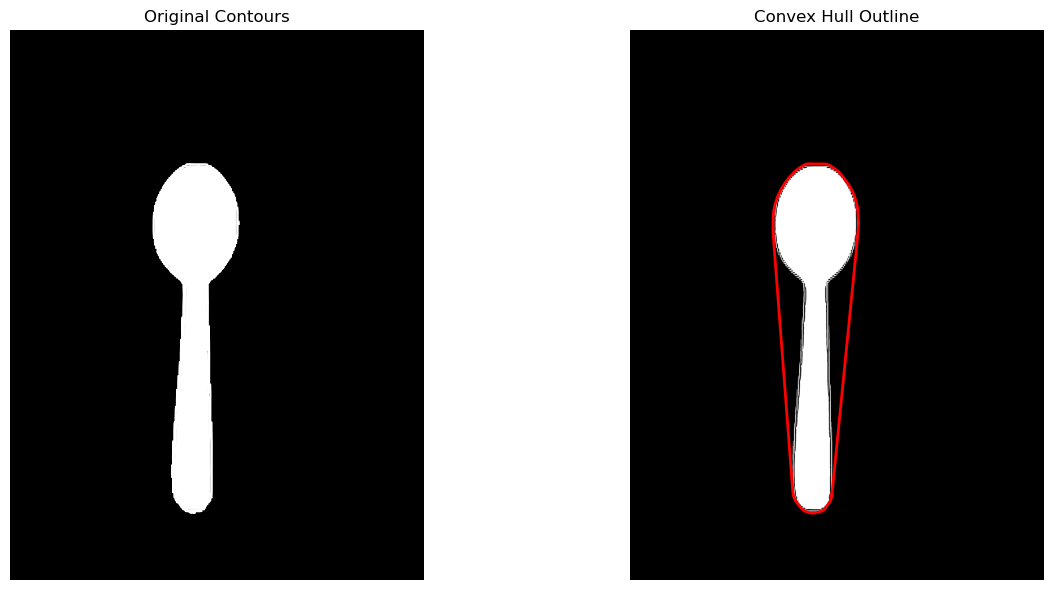

In [23]:
from rembg import remove
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from skimage import measure
from scipy.spatial import ConvexHull
import io

# Step 1: Load & remove background
input_path = 'test/images/test4.jpg'
img = Image.open(input_path).convert('RGBA')

img_bytes = io.BytesIO()
img.save(img_bytes, format='PNG')
img_bytes = img_bytes.getvalue()

output_bytes = remove(img_bytes)
output_img = Image.open(io.BytesIO(output_bytes)).convert('RGBA')

# Step 2: Extract alpha mask and threshold
alpha = np.array(output_img.split()[-1])
binary_mask = alpha > 0

# Step 3: Extract contours
contours = measure.find_contours(binary_mask, level=0.5)

# Step 4: Merge all contours into one point cloud
all_points = np.vstack(contours)

# Step 5: Compute convex hull
hull = ConvexHull(all_points)

# Step 6: Visualization
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Show binary mask + contours
ax[0].imshow(binary_mask, cmap='gray')
for contour in contours:
    ax[0].plot(contour[:, 1], contour[:, 0], linewidth=1, color='white')
ax[0].set_title('Original Contours')
ax[0].axis('off')

# Show convex hull
ax[1].imshow(binary_mask, cmap='gray')
# Close the polygon by repeating the first point
hull_points = all_points[hull.vertices]
hull_points = np.vstack([hull_points, hull_points[0]])
ax[1].plot(hull_points[:, 1], hull_points[:, 0], 'r-', linewidth=2)
ax[1].set_title('Convex Hull Outline')
ax[1].axis('off')

plt.tight_layout()
plt.show()


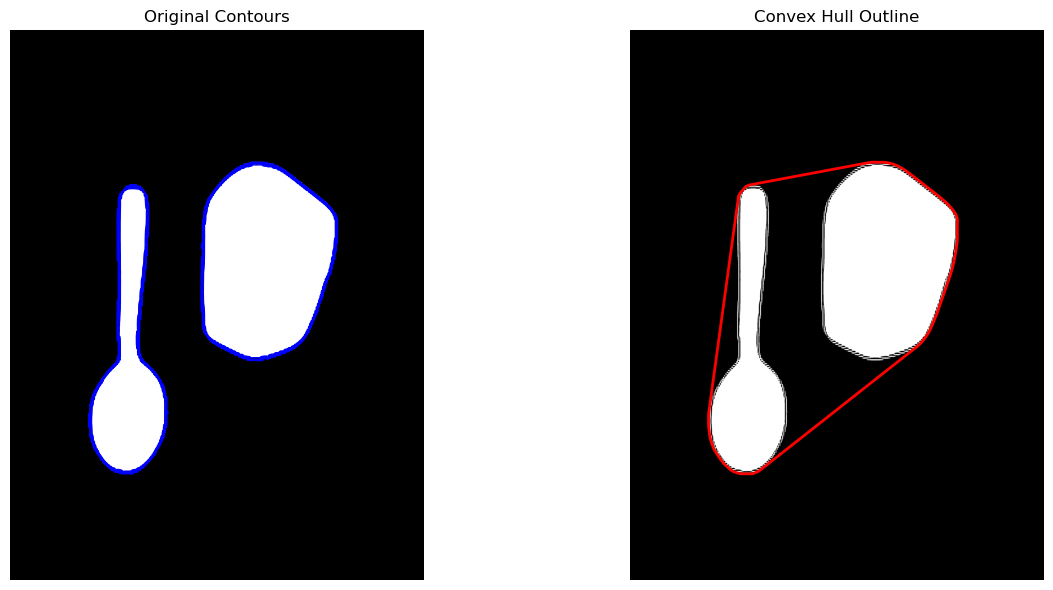

In [8]:
from rembg import remove
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from skimage import measure
from scipy.spatial import ConvexHull
import io

# Step 1: Load & remove background
input_path = 'test/images/test6.jpg'
img = Image.open(input_path).convert('RGBA')

img_bytes = io.BytesIO()
img.save(img_bytes, format='PNG')
img_bytes = img_bytes.getvalue()

output_bytes = remove(img_bytes)
output_img = Image.open(io.BytesIO(output_bytes)).convert('RGBA')

# Step 2: Extract alpha mask and threshold
alpha = np.array(output_img.split()[-1])
binary_mask = alpha > 0

# Step 3: Extract contours
contours = measure.find_contours(binary_mask, level=0.5)

# Step 4: Merge all contours into one point cloud
all_points = np.vstack(contours)

# Step 5: Compute convex hull
hull = ConvexHull(all_points)

# Step 6: Visualization
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Show binary mask + contours
ax[0].imshow(binary_mask, cmap='gray')
for contour in contours:
    ax[0].plot(contour[:, 1], contour[:, 0], linewidth=1, color='white')
ax[0].set_title('Original Contours')
ax[0].axis('off')

# Show convex hull
ax[1].imshow(binary_mask, cmap='gray')
# Close the polygon by repeating the first point
hull_points = all_points[hull.vertices]
hull_points = np.vstack([hull_points, hull_points[0]])
ax[1].plot(hull_points[:, 1], hull_points[:, 0], 'r-', linewidth=1)
ax[1].set_title('Convex Hull Outline')
ax[1].axis('off')

plt.tight_layout()
plt.show()


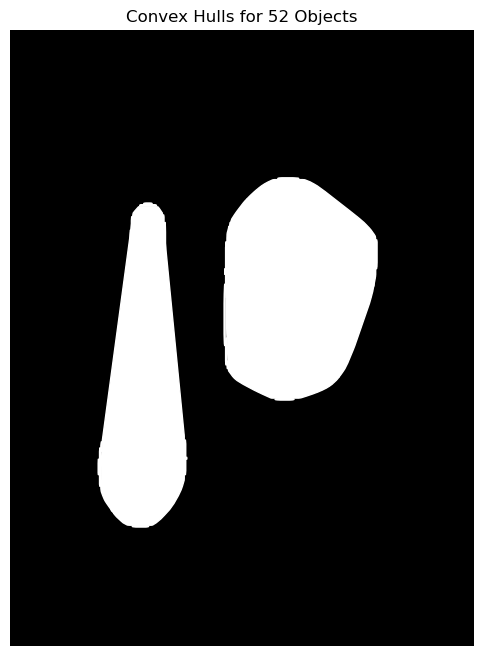

In [26]:
from rembg import remove
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from skimage import measure
from scipy.spatial import ConvexHull
from scipy.ndimage import label, find_objects
import io

# Step 1: Load & remove background
input_path = 'test/images/test6.jpg'
img = Image.open(input_path).convert('RGBA')

img_bytes = io.BytesIO()
img.save(img_bytes, format='PNG')
img_bytes = img_bytes.getvalue()

output_bytes = remove(img_bytes)
output_img = Image.open(io.BytesIO(output_bytes)).convert('RGBA')

# Step 2: Threshold the alpha channel
alpha = np.array(output_img.split()[-1])
binary_mask = alpha > 0

# Step 3: Label connected components
labeled, num_objects = label(binary_mask)
slices = find_objects(labeled)

# Step 4: Convex hulls for each object
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(binary_mask, cmap='gray')

for obj_id in range(1, num_objects + 1):
    mask = labeled == obj_id
    contours = measure.find_contours(mask, level=0.5)
    
    if not contours:
        continue

    # Merge all contours of this object
    points = np.vstack(contours)
    
    # Compute convex hull
    if len(points) >= 3:
        hull = ConvexHull(points)
        hull_pts = points[hull.vertices]
        hull_pts = np.vstack([hull_pts, hull_pts[0]])  # close the loop
        ax.fill(hull_pts[:, 1], hull_pts[:, 0], facecolor="white", edgecolor="white", linewidth=1)

        # ax.plot(hull_pts[:, 1], hull_pts[:, 0], linewidth=1, color="white")

ax.set_title(f'Convex Hulls for {num_objects} Objects')
ax.axis('off')
plt.show()


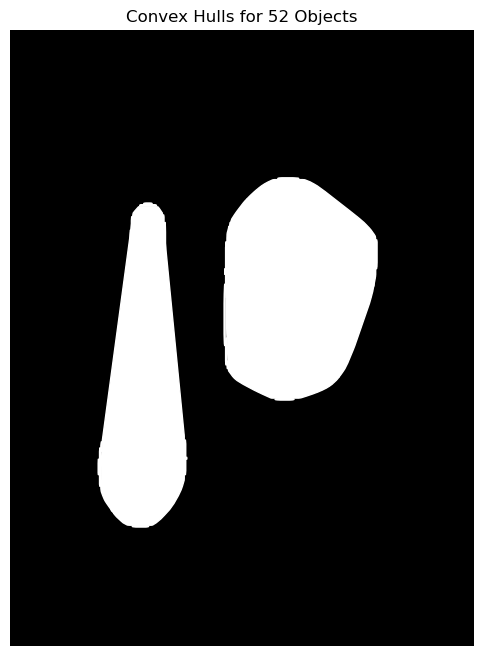

In [26]:
from rembg import remove
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from skimage import measure
from scipy.spatial import ConvexHull
from scipy.ndimage import label, find_objects
import io
from scipy.interpolate import splprep, splev

# Convert contour to a spline-smoothed path
def smooth_contour(points, smoothing=0.01, num_points=200):
    x, y = points[:, 0], points[:, 1]
    tck, _ = splprep([x, y], s=smoothing)
    u_fine = np.linspace(0, 1, num_points)
    x_smooth, y_smooth = splev(u_fine, tck)
    return np.vstack([x_smooth, y_smooth]).T

# Step 1: Load & remove background
input_path = 'test/images/test6.jpg'
img = Image.open(input_path).convert('RGBA')

img_bytes = io.BytesIO()
img.save(img_bytes, format='PNG')
img_bytes = img_bytes.getvalue()

output_bytes = remove(img_bytes)
output_img = Image.open(io.BytesIO(output_bytes)).convert('RGBA')

# Step 2: Threshold the alpha channel
alpha = np.array(output_img.split()[-1])
binary_mask = alpha > 0

# Step 3: Label connected components
labeled, num_objects = label(binary_mask)
slices = find_objects(labeled)

# Step 4: Convex hulls for each object
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(binary_mask, cmap='gray')

for obj_id in range(1, num_objects + 1):
    mask = labeled == obj_id
    contours = measure.find_contours(mask, level=0.5)
    
    if not contours:
        continue

    # Merge all contours of this object
    points = np.vstack(contours)
    
    # Compute convex hull
    if len(points) >= 3:
        hull = ConvexHull(points)
        hull_pts = points[hull.vertices]
        hull_pts = np.vstack([hull_pts, hull_pts[0]])  # close the loop
        hull_pts = smooth_contour(hull_pts, smoothing=5.0)
        ax.plot(hull_pts[:, 1], hull_pts[:, 0], color='white')  # or fill for solid shape
        ax.fill(hull_pts[:, 1], hull_pts[:, 0], facecolor="white", edgecolor="white", linewidth=1)

        # ax.plot(hull_pts[:, 1], hull_pts[:, 0], linewidth=1, color="white")

ax.set_title(f'Convex Hulls for {num_objects} Objects')
ax.axis('off')
plt.show()


In [13]:
from rembg import remove
from PIL import Image
import numpy as np
from skimage import measure
from scipy.ndimage import label
import svgwrite
import io

# Step 1: Load image and remove background
input_path = 'test/images/test6.jpg'

img = Image.open(input_path).convert('RGBA')

img_bytes = io.BytesIO()
img.save(img_bytes, format='PNG')
img_bytes = img_bytes.getvalue()

output_bytes = remove(img_bytes)
output_img = Image.open(io.BytesIO(output_bytes)).convert('RGBA')

# Step 2: Threshold alpha channel to create binary mask
alpha = np.array(output_img.split()[-1])
binary_mask = alpha > 0

# Step 3: Label connected components
labeled, num_objects = label(binary_mask)

# Step 4: Create SVG canvas
height, width = binary_mask.shape
dwg = svgwrite.Drawing('output.svg', size=(f'{width}px', f'{height}px'))
dwg.viewbox(0, 0, width, height)

# Step 5: Extract contours and write to SVG
for obj_id in range(1, num_objects + 1):
    mask = labeled == obj_id
    contours = measure.find_contours(mask, level=0.5)

    for contour in contours:
        # Flip from (row, col) to (x, y)
        points = [(x, y) for y, x in contour]
        # Convert to SVG path string
        path_data = f'M {points[0][0]:.2f},{points[0][1]:.2f} ' + \
                    ' '.join(f'L {pt[0]:.2f},{pt[1]:.2f}' for pt in points[1:]) + ' Z'
        # Add to SVG
        dwg.add(dwg.path(d=path_data, fill='none', stroke='black', stroke_width=1))

# Step 6: Save SVG file
dwg.save()
print("✅ SVG saved as output.svg")


✅ SVG saved as output.svg


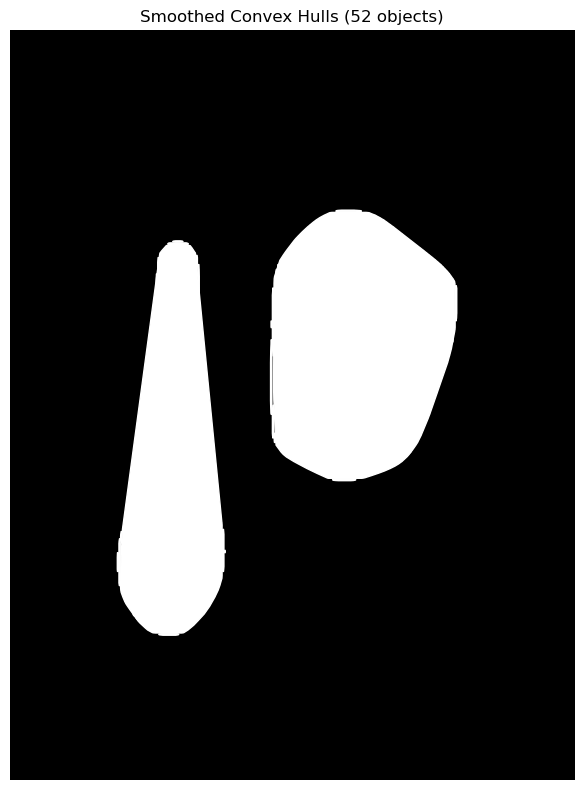

In [31]:
from rembg import remove
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from skimage import measure
from scipy.spatial import ConvexHull
from scipy.ndimage import label
from scipy.interpolate import splprep, splev
import io

# --- Step 1: Load and remove background ---
input_path = 'test/images/test6.jpg'
img = Image.open(input_path).convert('RGBA')

img_bytes = io.BytesIO()
img.save(img_bytes, format='PNG')
img_bytes = img_bytes.getvalue()

output_bytes = remove(img_bytes)
output_img = Image.open(io.BytesIO(output_bytes)).convert('RGBA')

# --- Step 2: Threshold the alpha channel ---
alpha = np.array(output_img.split()[-1])
binary_mask = alpha > 0

# --- Step 3: Label connected components ---
labeled, num_objects = label(binary_mask)

# --- Step 4: Helper function to smooth a 2D point set using B-spline ---
def smooth_contour(points, smoothing=5.0, num_points=200):
    x, y = points[:, 0], points[:, 1]
    
    # Wrap points if not already closed
    if not np.allclose(points[0], points[-1]):
        x = np.append(x, x[0])
        y = np.append(y, y[0])
    
    try:
        tck, _ = splprep([x, y], s=smoothing, per=True)
        u_fine = np.linspace(0, 1, num_points)
        x_smooth, y_smooth = splev(u_fine, tck)
        return np.vstack([x_smooth, y_smooth]).T
    except:
        # fallback: return original if splprep fails
        return points

# --- Step 5: Plot results ---
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(binary_mask, cmap='gray')

for obj_id in range(1, num_objects + 1):
    mask = labeled == obj_id
    contours = measure.find_contours(mask, level=0.5)
    
    if not contours:
        continue

    # Merge all contours of this object
    points = np.vstack(contours)
    
    # Compute convex hull
    if len(points) >= 3:
        hull = ConvexHull(points)
        hull_pts = points[hull.vertices]
        hull_pts = np.vstack([hull_pts, hull_pts[0]])  # close the loop

        # Fill the convex hull with white
        ax.fill(hull_pts[:, 1], hull_pts[:, 0], facecolor="white", edgecolor="white", linewidth=1)


ax.set_title(f'Smoothed Convex Hulls ({num_objects} objects)')
ax.axis('off')
plt.tight_layout()
plt.show()


In [32]:
from rembg import remove
from PIL import Image
import numpy as np
from skimage import measure
from scipy.ndimage import label
from scipy.spatial import ConvexHull
from rdp import rdp
import svgwrite
import io

# Load image and remove background
input_path = 'test/images/test6.jpg'
img = Image.open(input_path).convert('RGBA')
img_bytes = io.BytesIO()
img.save(img_bytes, format='PNG')
img_bytes = img_bytes.getvalue()
output_bytes = remove(img_bytes)
output_img = Image.open(io.BytesIO(output_bytes)).convert('RGBA')

# Convert to binary alpha mask
alpha = np.array(output_img.split()[-1])
binary_mask = alpha > 0

# Label connected components
labeled, num_objects = label(binary_mask)

# Setup SVG canvas
height, width = binary_mask.shape
dwg = svgwrite.Drawing('output_rdp.svg', size=(f'{width}px', f'{height}px'))
dwg.viewbox(0, 0, width, height)

# Loop through each object
for obj_id in range(1, num_objects + 1):
    mask = labeled == obj_id
    contours = measure.find_contours(mask, level=0.5)

    if not contours:
        continue

    # Merge all contours to get full shape
    points = np.vstack(contours)

    # Compute convex hull if enough points
    if len(points) >= 3:
        hull = ConvexHull(points)
        hull_pts = points[hull.vertices]

        # Close the loop for visual consistency
        hull_pts = np.vstack([hull_pts, hull_pts[0]])

        # Simplify using RDP
        simplified = rdp(hull_pts.tolist(), epsilon=2.0)
        simplified = np.array(simplified)

        # Convert to SVG path string
        path_data = f'M {simplified[0][1]:.2f},{simplified[0][0]:.2f} ' + \
                    ' '.join(f'L {pt[1]:.2f},{pt[0]:.2f}' for pt in simplified[1:]) + ' Z'

        # Add filled shape with white
        dwg.add(dwg.path(
            d=path_data,
            fill='white',
            stroke='black',
            stroke_width=2
        ))

# Save final SVG
dwg.save()
print("✅ Simplified convex hulls saved to output_rdp.svg")


✅ Simplified convex hulls saved to output_rdp.svg


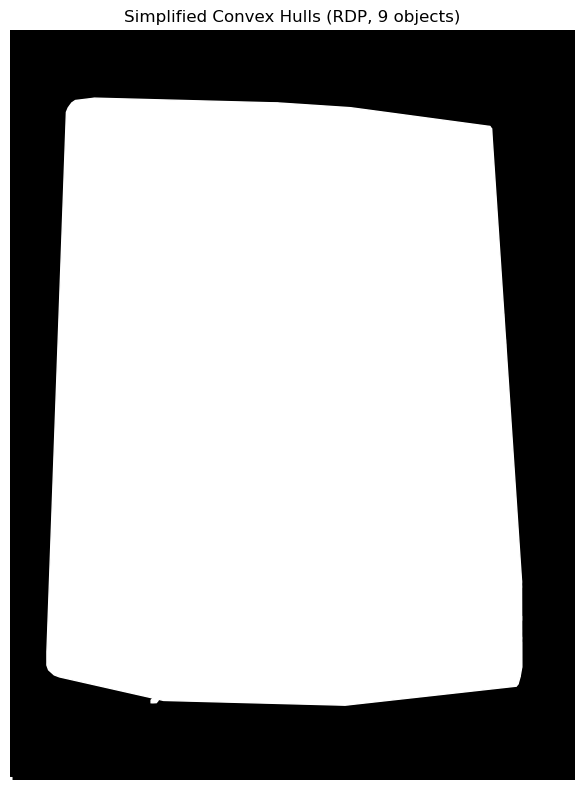

In [39]:
from rembg import remove
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from skimage import measure
from scipy.ndimage import label
from scipy.spatial import ConvexHull
from rdp import rdp
import io
# Step 1: Load & remove background
input_path = 'test/images/test7.jpg'
# input_path = 'test/images/test2.webp'
img = Image.open(input_path).convert('RGBA')

img_bytes = io.BytesIO()
img.save(img_bytes, format='PNG')
img_bytes = img_bytes.getvalue()

output_bytes = remove(img_bytes)
output_img = Image.open(io.BytesIO(output_bytes)).convert('RGBA')

# Step 2: Threshold the alpha channel
alpha = np.array(output_img.split()[-1])
binary_mask = alpha > 0

# Step 3: Label connected components
labeled, num_objects = label(binary_mask)

# Step 4: Plot with clean simplified lines
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(binary_mask, cmap='gray')

for obj_id in range(1, num_objects + 1):
    mask = labeled == obj_id
    contours = measure.find_contours(mask, level=0.5)

    if not contours:
        continue

    # Combine contours for this object
    points = np.vstack(contours)

    # Compute convex hull
    if len(points) >= 3:
        hull = ConvexHull(points)
        hull_pts = points[hull.vertices]
        hull_pts = np.vstack([hull_pts, hull_pts[0]])  # close loop

        # Simplify the outline with RDP
        simplified = rdp(hull_pts.tolist(), epsilon=2.0)
        simplified = np.array(simplified)

        # Draw 1px thin white outline
        # ax.plot(simplified[:, 1], simplified[:, 0], color='white', linewidth=1)
        ax.fill(simplified[:, 1], simplified[:, 0], facecolor="white", edgecolor="white", linewidth=1)

ax.set_title(f'Simplified Convex Hulls (RDP, {num_objects} objects)')
ax.axis('off')
plt.tight_layout()
plt.show()
